In [1]:
import numpy as np
from dataset import RADIal
from loader import CreateDataLoaders
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from torch.utils.data import Dataset, DataLoader, random_split,Subset

In [2]:
dataset = RADIal(root_dir = 'D:/RADIal_Project/RADIal',difficult=True)

In [3]:
# pick-up randomly any sample
data = dataset.__getitem__(np.random.randint(len(dataset)))

radar name: D:/RADIal_Project/RADIal\radar_FFT\fft_001520.npy


## Camera

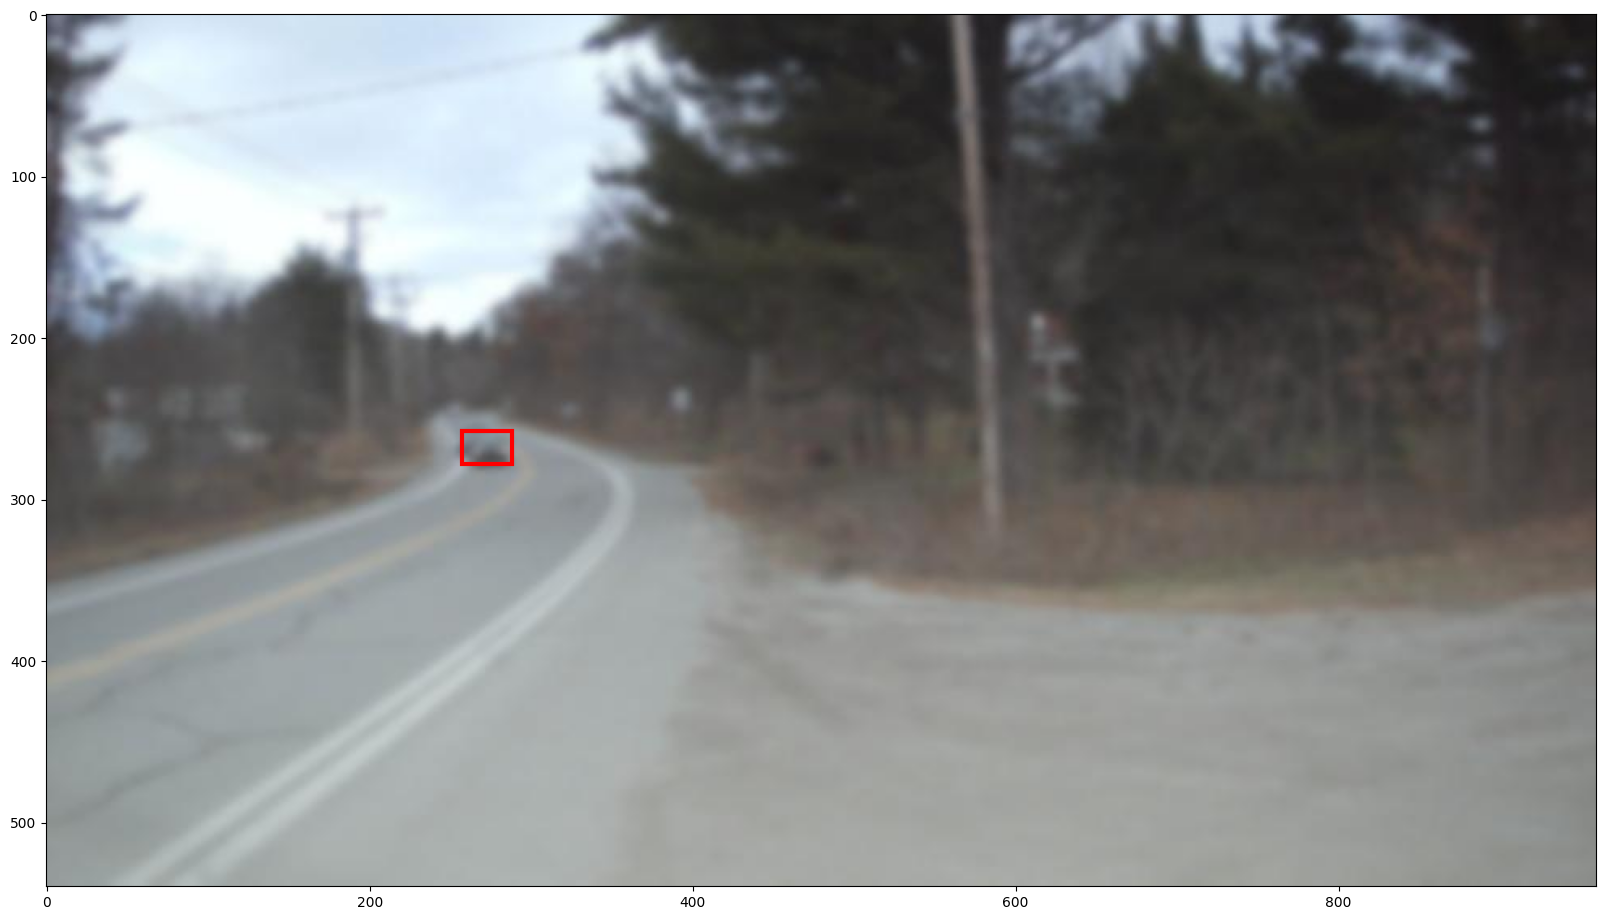

In [4]:
image = data[0]
boxes = data[5]

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)

for box in boxes:
    if(box[0]==-1):
        break # -1 means no object
    rect = Rectangle(box[:2]/2,(box[2]-box[0])/2,(box[3]-box[1])/2,linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
# Note, coordinates are divided by 2 as image were saved in quarter resolution

# Laser Point Cloud

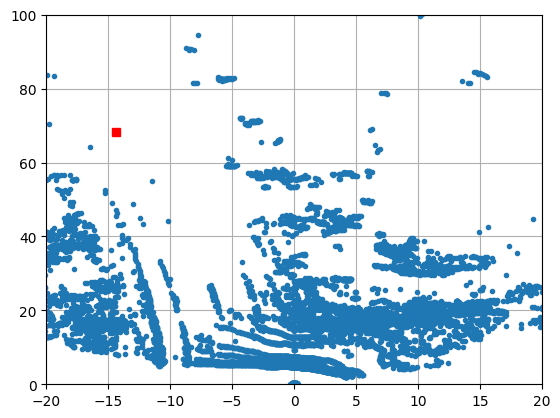

In [5]:
laser_pc = data[3]

plt.plot(-laser_pc[:,1],laser_pc[:,0],'.')
for box in boxes:
    if(box[0]==-1):
        break # -1 means no object
    plt.plot(box[4],box[5],'rs')
plt.xlim(-20,20)
plt.ylim(0,100)
plt.grid()

# Radar Point Cloud

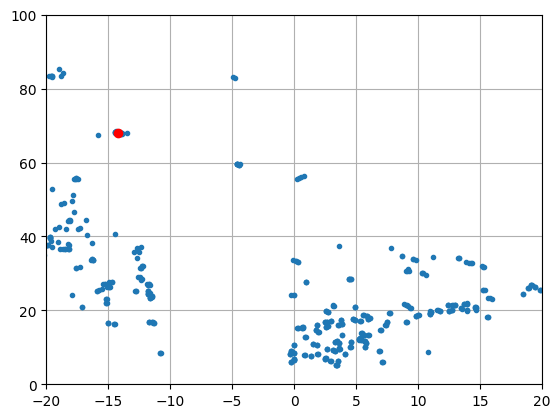

In [6]:
radar_pc = data[2]

plt.plot(-radar_pc[:,1],radar_pc[:,0],'.')
for box in boxes:
    if(box[0]==-1):
        break # -1 means no object
    plt.plot(box[7],box[8],'ro')
plt.xlim(-20,20)
plt.ylim(0,100)
plt.grid()

# Radar FFT spectrums

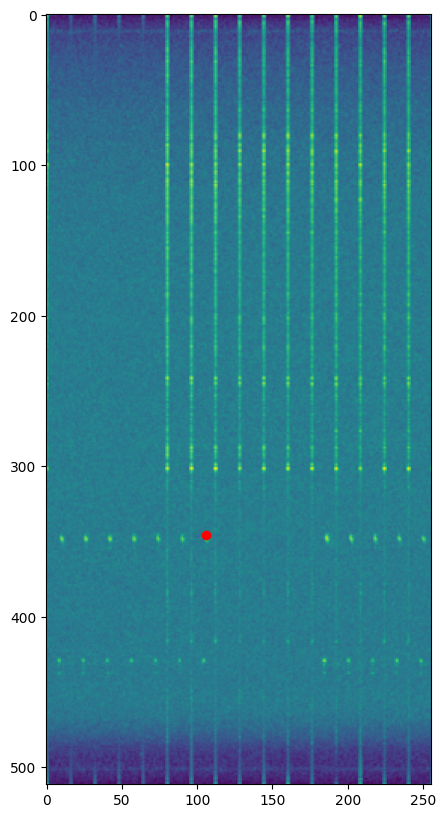

In [7]:
radar_FFT = data[1]
radar_FFT = radar_FFT[...,::2]+1j*radar_FFT[...,1::2]
power_spectrum = np.sum(np.abs(radar_FFT),axis=2)

plt.figure(figsize=(10,10))
plt.imshow(np.log10(power_spectrum))

for box in boxes:
    if(box[0]==-1):
        break # -1 means no object
    Range = box[9] * 512/103 # 512 range bins for 103m
    Azimuth = box[10]
    Doppler = box[11]
    plt.plot(Doppler,Range,'ro')

# Segmentation map

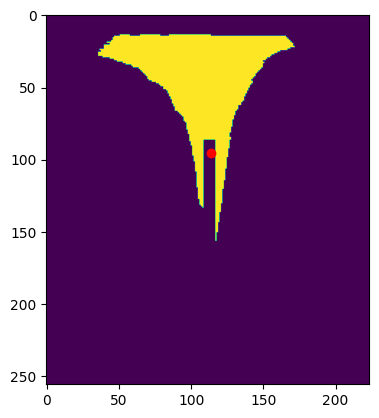

In [8]:
segmap = data[4]
plt.imshow(segmap) # In polar coordinnates
# Range resolution divided by 2
# Azimuth angle crop to 448 and resolution divided by 2
for box in boxes:
    if(box[0]==-1):
        break # -1 means no object
    Range = box[9]*512/103/2
    Azimuth = -box[10]/0.4

    plt.plot(segmap.shape[1]/2+Azimuth ,Range,'ro')

# Pytorch Loader

In [ ]:
# Loader split the dataset in Train, Validation, and Test set based on sequences, 
# that is to say samples from a sequence can not be mixed between sets

In [9]:
train_loader, val_loader, test_loader = CreateDataLoaders(dataset)
print('Batch size:',[train_loader.batch_size, val_loader.batch_size,test_loader.batch_size])
print('train_loader:',len(train_loader))
print('val_loader:',len(val_loader))
print('test_loader:',len(test_loader))

Batch size: [4, 4, 4]
train_loader: 1558
val_loader: 247
test_loader: 259
